<a href="https://colab.research.google.com/github/anuragbantu/DL-Assignment-1/blob/main/Assignment%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import fashion_mnist




**Question 1**

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

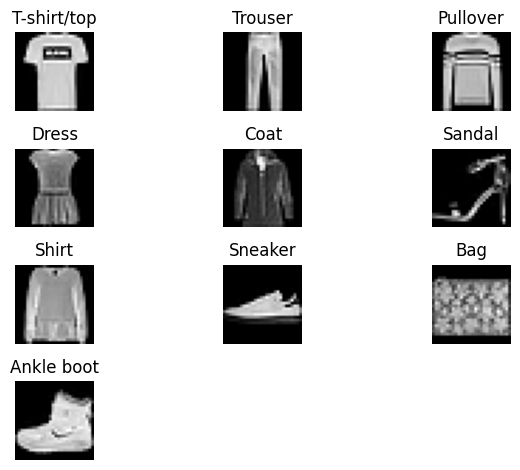

In [6]:
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(4, 3, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Question 2**

preparing the dataset.

In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.0



In [13]:
y_train.shape

(60000, 10)

In [15]:
x_train.shape

(60000, 28, 28, 1)

Define a class for layers.

In [45]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)


In [48]:
class layer:
  def __init__(self,input,neurons,activation):
    self.weights = np.random.randn(input,neurons)
    self.bias = np.zeros((1,neurons))
    self.activation = activation

  def forward(self, a_prev):
    self.a_prev = a_prev
    self.z = np.dot(self.a_prev,self.weights) + self.bias
    self.a = self.activation(self.z)
    return self.a

layers = [layer(784,784,sigmoid),layer(784,10,sigmoid),layer(10,10,softmax)]

In [49]:
x_train = x_train.reshape(x_train.shape[0], -1)


a= x_train
for layer in layers:
  a = layer.forward(a)

a

array([[0.34266787, 0.00062899, 0.01779916, ..., 0.01259009, 0.221792  ,
        0.14563118],
       [0.34319993, 0.00062706, 0.01786792, ..., 0.01257735, 0.22190888,
        0.14562523],
       [0.34261271, 0.00062267, 0.01642264, ..., 0.0127    , 0.21711092,
        0.14848891],
       ...,
       [0.34083367, 0.00063174, 0.01676622, ..., 0.01269492, 0.21868375,
        0.14730074],
       [0.34210369, 0.00062911, 0.01729517, ..., 0.01263794, 0.22022965,
        0.14650485],
       [0.34247371, 0.00062585, 0.01692704, ..., 0.01266319, 0.21889802,
        0.14735586]])

In [50]:
sum(a[1])

1.0000000000000002

# Question 3